# Project Title: LinkedIn Job Search Scraper
Project Overview:
The LinkedIn Job Search Scraper is a Python-based web scraping project that allows users to scrape job listings from LinkedIn for a specified job title. It utilizes web automation tools, Selenium and BeautifulSoup, to extract job listings and associated information. The project can also send an email containing the scraped job data as an attachment.

Project Features:
1. Job Scraping:
Log in to a LinkedIn account programmatically.
Perform a job search for a user-defined job title.
Apply filters to refine job search results.
Scrape job data, including job titles, company names, locations, and job URLs.
2. Data Handling:
Organize the scraped job data into a structured format.
Save the data to a CSV file for further analysis and reference.
3. Email Notification:
Send an email containing the scraped job data as an attachment.
Email subject, body, sender, and recipient information can be customized.nkedIn job search automation.

# User Authentication
- Prompt the user to input their LinkedIn username or phone number.
- Securely input the LinkedIn password using getpass.
# Job Search
* Initialize a Chrome WebDriver using Selenium.
* Navigate to the LinkedIn homepage.
* Log in to LinkedIn.
* Apply filters to refine job search results.
# Data Extraction
- Scroll the page to load additional job listings.
- Extract job data and create a Pandas DataFrame.
# Data Analysis
- Perform initial data analysis if required.
# Conclusion
- Summarize the key findings and results of the LinkedIn job search automation.

In [1]:
import pandas as pd
import getpass
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.actions.wheel_input import ScrollOrigin
from selenium.webdriver import ActionChains
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from email.mime.text import MIMEText
import smtplib

In [2]:
def get_job_title(soup):
    title = 'disabled ember-view job-card-container__link job-card-list__title'
    title_tag = soup.find_all('a', {'class': title})
    titles = [title.text.strip() for title in title_tag]
    return titles

Let's create some helper functions to parse information from the page.
Here we get the job Titles scraped.
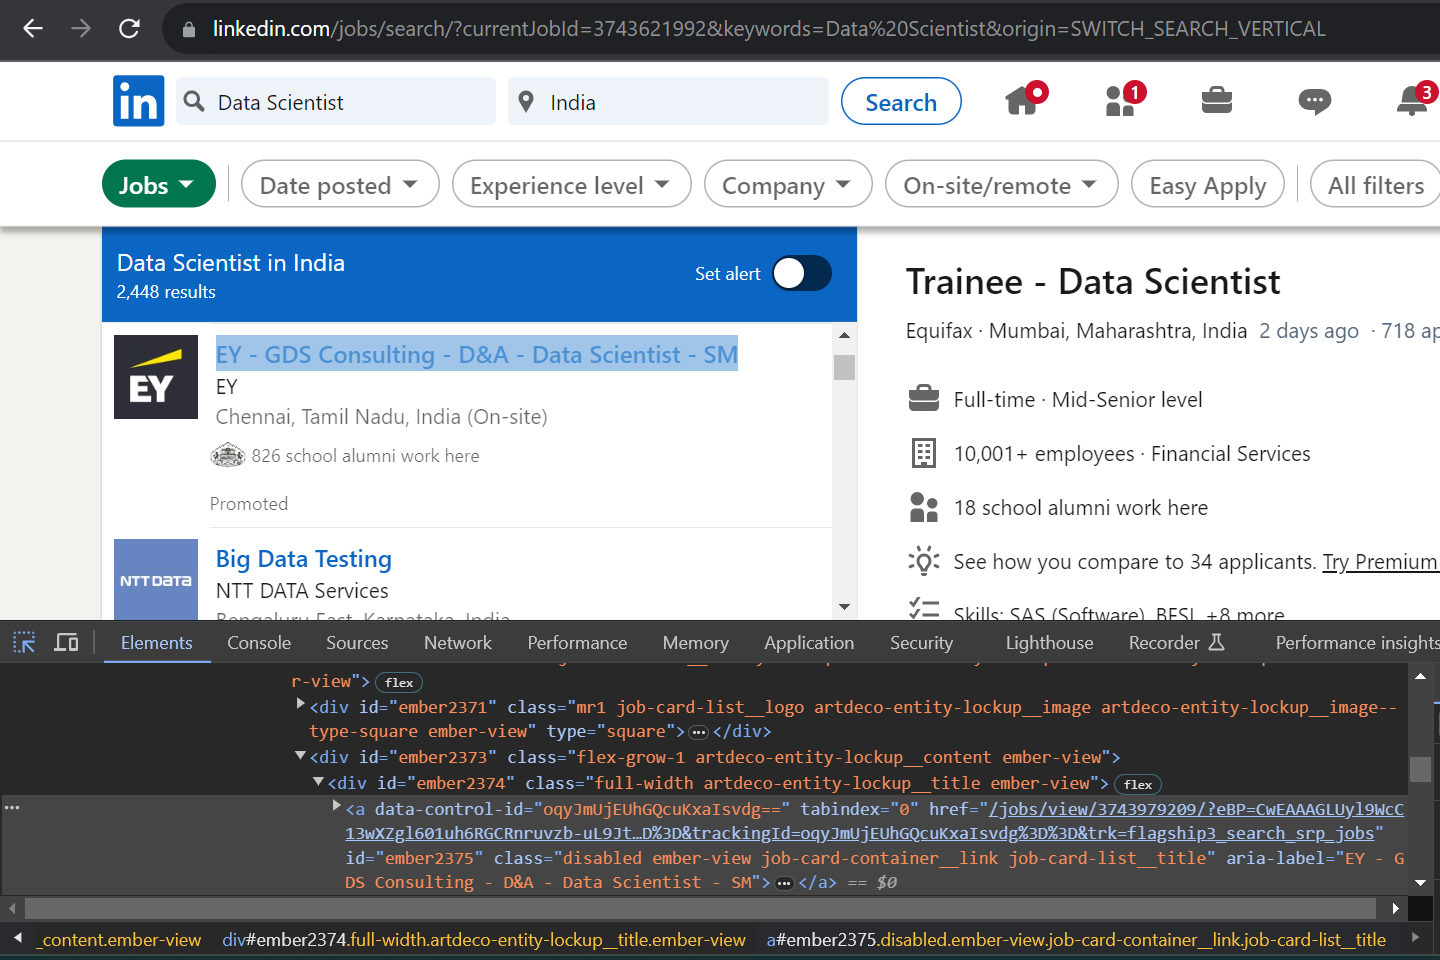

In [3]:
def get_company(soup):
    company = 'artdeco-entity-lockup__subtitle ember-view'
    companies = soup.find_all('div', {'class': company})
    company_name = [comp.text.strip() for comp in companies]
    return company_name

We get the Name of Company/Employer who is recruiting
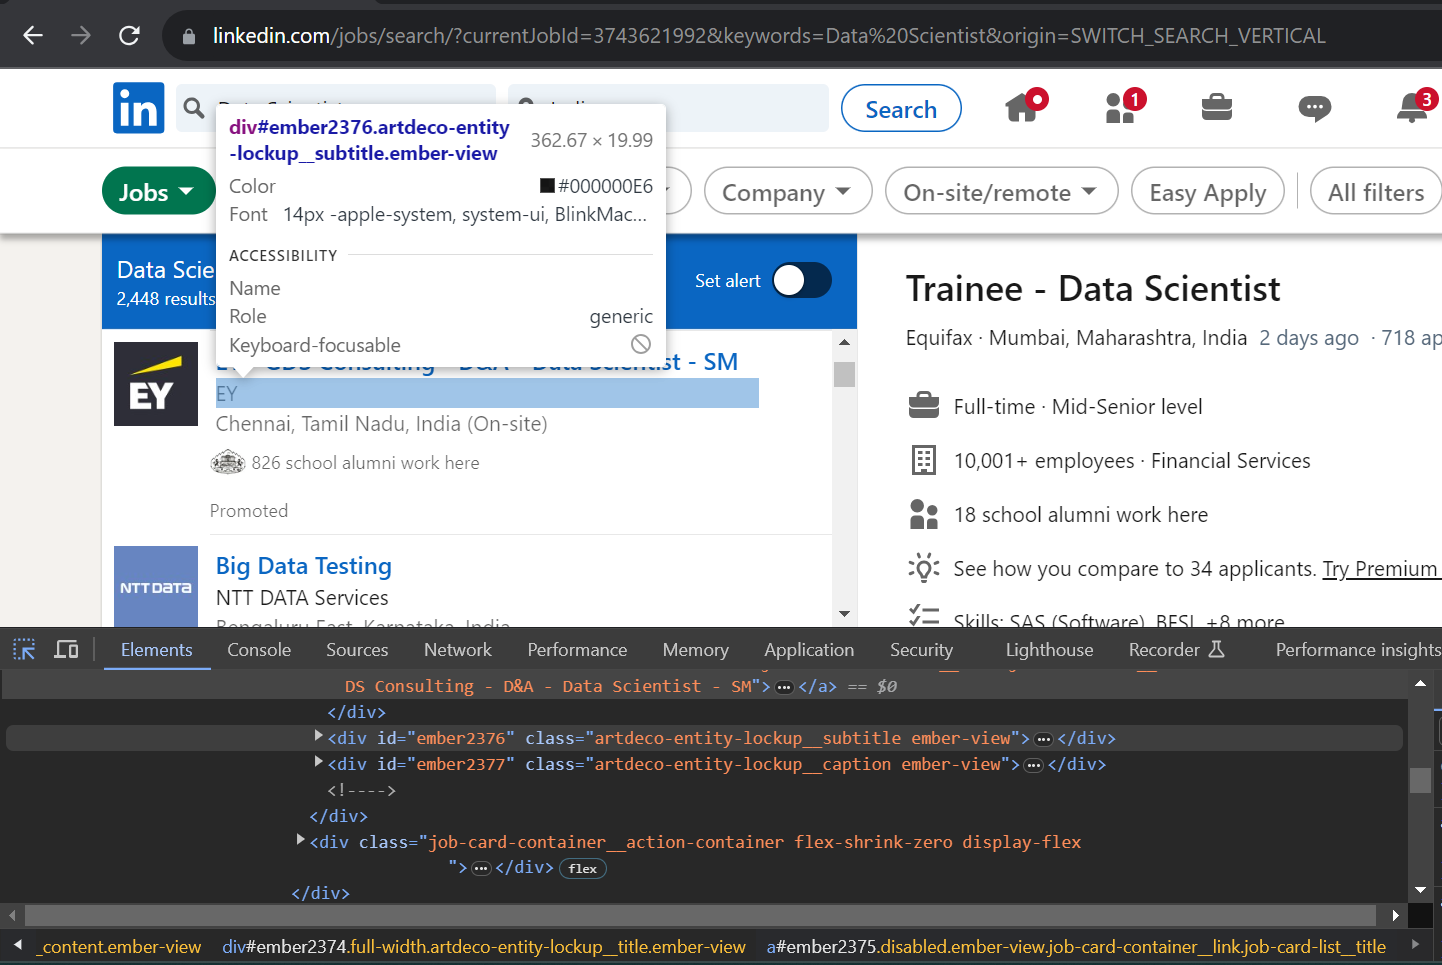

In [4]:
def get_location(soup):
    loc = 'artdeco-entity-lockup__caption ember-view'
    locat = soup.find_all('div',{'class':loc})
    location = [loct.text.strip() for loct in locat]
    return location

By this function we are able to extract the location
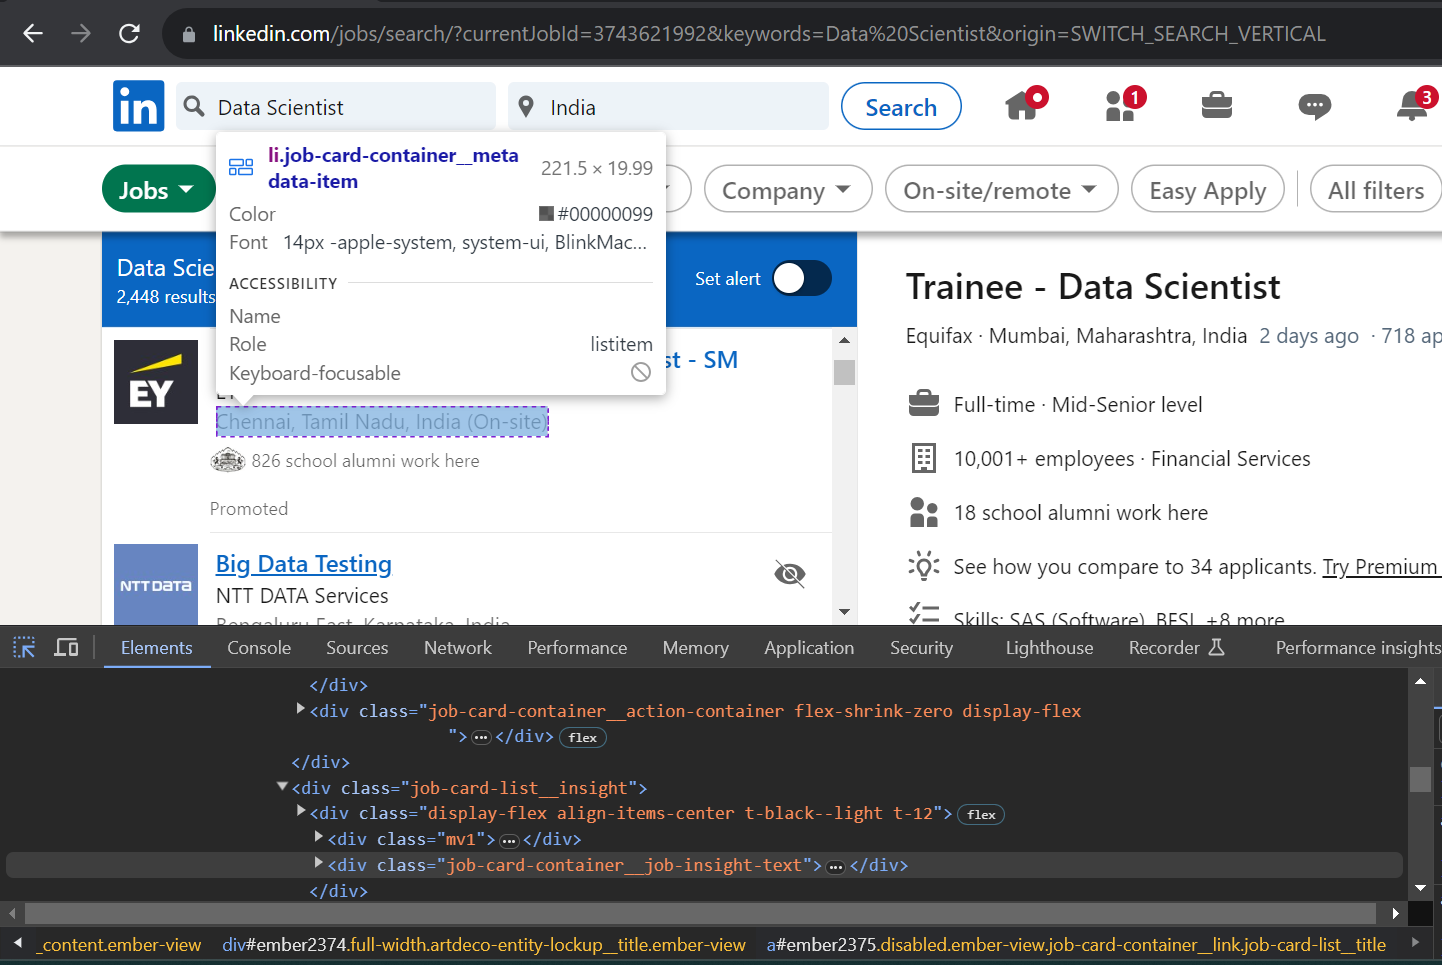

In [5]:
def get_url(soup):
    url_tag = soup.find_all('a','disabled ember-view job-card-container__link job-card-list__title')
    base_url = 'https://www.linkedin.com'
    link = [base_url + tag['href'] for tag in url_tag]
    return link

Inorder to apply for job,we need to get url,by this function we are able to extract url of a specific job
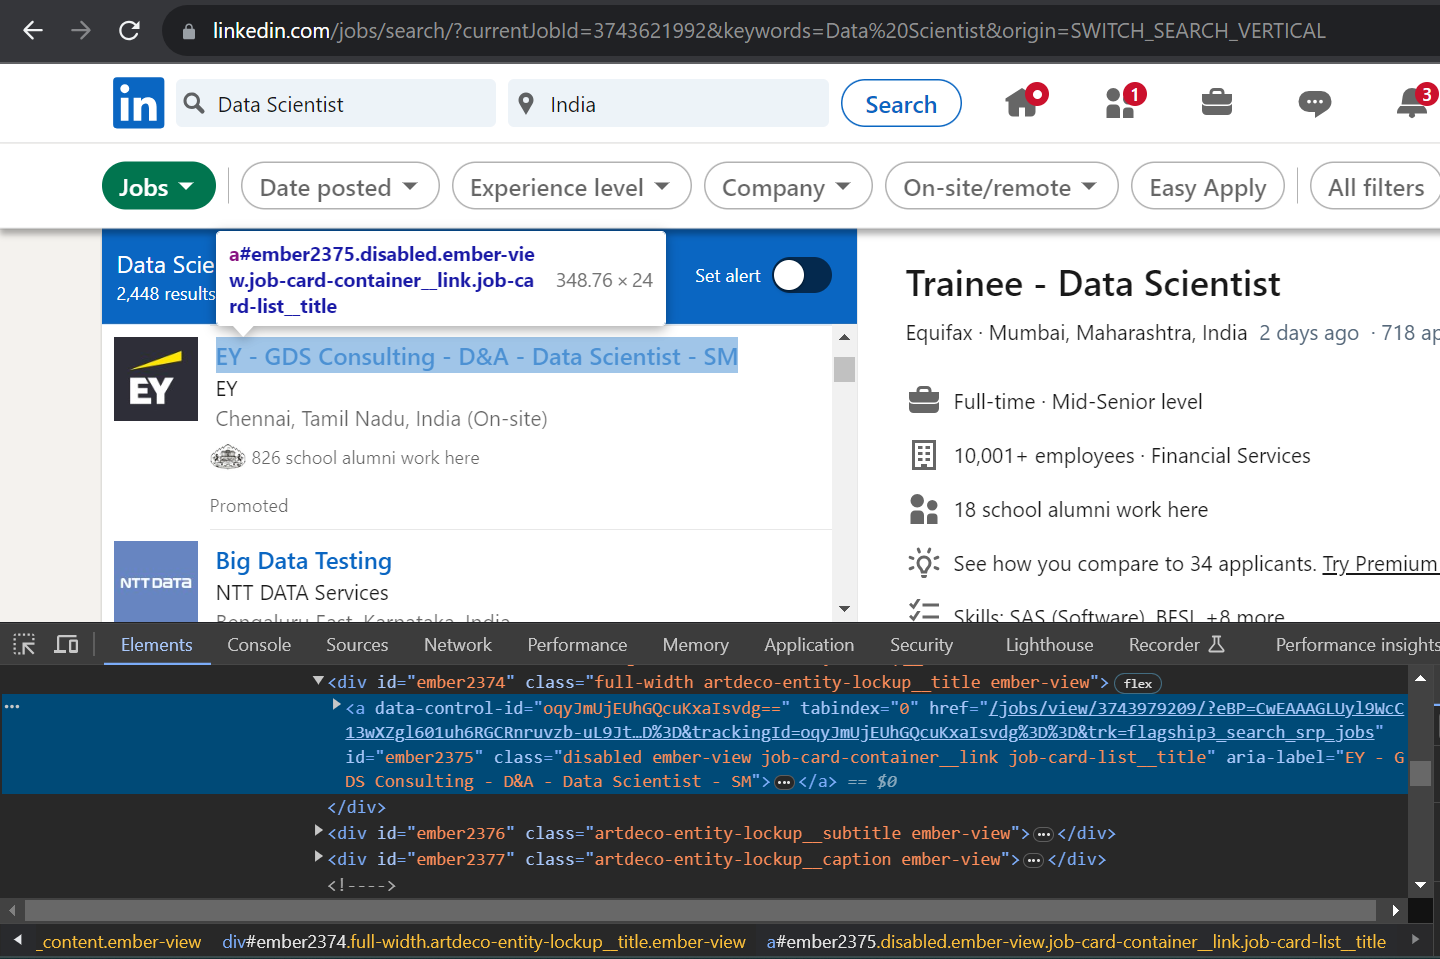 

In [6]:
def info(soup):
    info_dict = {'Job Title': get_job_title(soup), 'Company Name': get_company(soup), 'Location': get_location(soup), 'Link':get_url(soup)}
    return info_dict

This is our Super Function which extracts all the Information for a Job and stores it in Dictionary info_dict

In [7]:
def send_mail():
    try:
        msg = MIMEMultipart()
        MESSAGE_BODY = "Hello, this is a test message."
        body_part = MIMEText(MESSAGE_BODY, 'plain')
        msg['Subject'] = 'Top 100 Job Searches'
        msg['From'] = 'harshraut015@gmail.com'
        msg['To'] = 'harsh015raut@gmail.com'
        PATH_TO_CSV_FILE = 'linkedin_data.csv'
        # Add body to email
        msg.attach(body_part)

        # open and read the CSV file in binary
        with open(PATH_TO_CSV_FILE, 'rb') as file:
            # Attach the file with filename to the email
            msg.attach(MIMEApplication(file.read(), Name='linkedin_data.csv'))

        # Create SMTP object with a secure connection (TLS)
        smtp_obj = smtplib.SMTP_SSL('smtp.gmail.com', 465)

        # Login to the server
        smtp_obj.login('harshraut015@gmail.com', 'shrijealolislvtm')

        # Convert the message to a string and send it
        smtp_obj.sendmail(msg['From'], msg['To'], msg.as_string())

        print("Email sent successfully!")
        # Close the connection
        smtp_obj.quit()
    except Exception as e:
        print("An error occurred while sending the email:", str(e))

This function is used to our extracted CSV form Data Through E-mail.
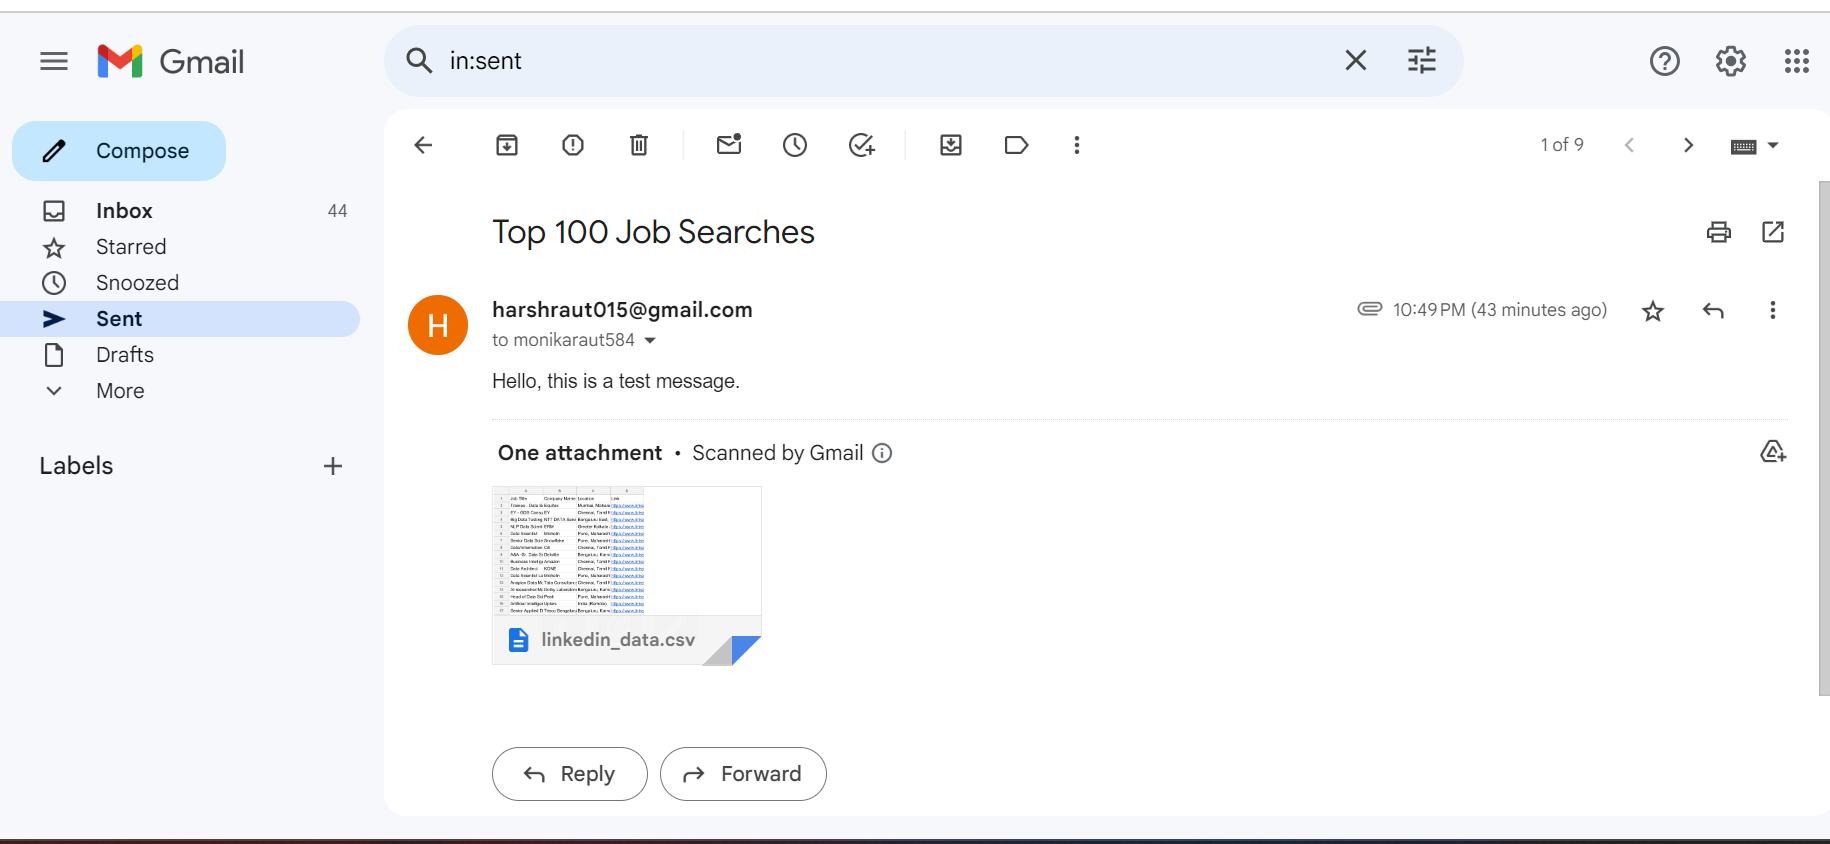

In [8]:
username = input("Enter Username or Phone Number:")
password = getpass.getpass("Enter your LinkedIn Password:")

driver = webdriver.Chrome()
url = 'https://www.linkedin.com/home'
driver.get(url)
driver.maximize_window()
time.sleep(3)
uname = driver.find_element(By.ID, 'session_key')
uname.send_keys(username)
pas = driver.find_element(By.ID, 'session_password')
pas.send_keys(password)
driver.find_element(By.XPATH, "//button[@type='submit']").click()
time.sleep(25)

search = "Data Scientist"
search_element = driver.find_element(By.CSS_SELECTOR, "input.search-global-typeahead__input")
search_element.clear()
search_element.send_keys(search)
search_element.send_keys(Keys.RETURN)
time.sleep(3)

driver.find_element(By.CSS_SELECTOR,'.artdeco-pill.artdeco-pill--slate.artdeco-pill--choice.artdeco-pill--2.search-reusables__filter-pill-button').click()
time.sleep(5)
# Scrolling page
driver.implicitly_wait(20)
footer = driver.find_element(By.XPATH, '//*[@id="main"]/div/div[1]/div')
scroll_origin = ScrollOrigin.from_element(footer)

data_list = []  # Create an empty list to store data
for i in range(4):
    # Add a delay to allow the page to load
    button = driver.find_element(By.CSS_SELECTOR, f'button[aria-label="Page {i+1}"]')
    if i+1 != 1:
        button.click()
        time.sleep(15)

    for _ in range(7):
        ActionChains(driver).scroll_from_origin(scroll_origin, 0, 500).perform()
        time.sleep(6)

    # Create a new BeautifulSoup object for the current page
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')
    data = info(soup)
    print(data)
    # Append the data to the list
    data_list.append(data)

# Create a DataFrame
df = pd.DataFrame({
    'Job Title': [item for sublist in [d['Job Title'] for d in data_list] for item in sublist],
    'Company Name': [item for sublist in [d['Company Name'] for d in data_list] for item in sublist],
    'Location': [item for sublist in [d['Location'] for d in data_list] for item in sublist],
    'Link': [item for sublist in [d['Link'] for d in data_list] for item in sublist]
})

# Save to a CSV file
df.to_csv('linkedin_data.csv', index=None)

Enter Username or Phone Number: haschat.test2@gmail.com
Enter your LinkedIn Password: ········


{'Job Title': ['Trainee - Data Scientist', 'Data Scientist,D&T', 'Data Scientist', 'Scientist, Data Science', 'Data Scientist', 'Associate - Data Science', 'Data Scientist - Communcation Platform', 'Data Scientist, gt.school (Remote) - $30,000/year USD', 'Data Scientist', 'Data & Applied Scientist 2', 'Data Scientist Level_1', 'Applied Data Scientist', 'Data Scientist Senior', 'Associate Data Scientist', 'Data Scientist', 'Senior Statistical Data Scientist', 'Data Scientist Analyst', 'Data Scientist', 'Data Scientist', 'Associate Data Scientist I', 'Senior Data Scientist', 'Data Scientist, Product Analytics', 'Hiring For Data Analyst', 'Associate Data Scientist', 'NLP Data Scientist (Mid - Senior Level)'], 'Company Name': ['Equifax', 'West Pharmaceutical Services', 'Recruin', 'XPO', 'Michelin', 'Axtria - Ingenious Insights', 'Gojek', 'Crossover', 'Infiniti Research Ltd.', 'Microsoft', 'Michelin', 'Tesco Bengaluru', 'FIS', 'Danaher Corporation', 'Koch Industries', 'Pfizer', 'Alp Consult

This is our Main Driver Function which Converts the extracted data to DataFrame and then stores it permanently in CSV format.
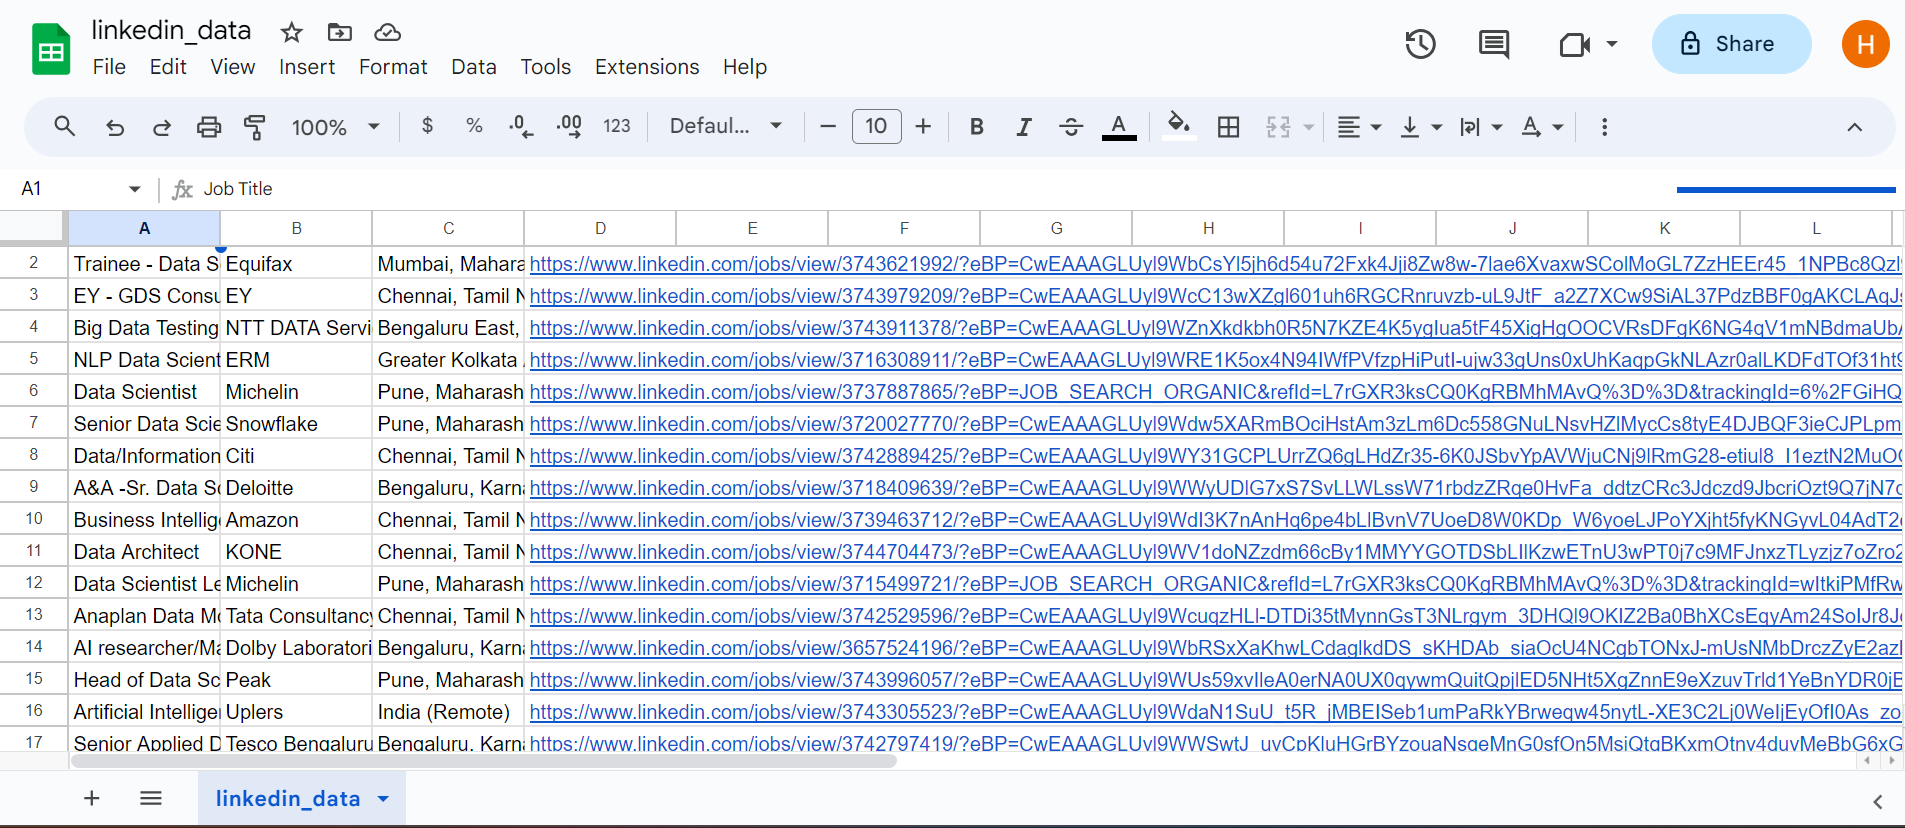